In [60]:

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
dir = "KFF"

filenames = {
    "" : "2022",
    " (1)" : "2021",
    " (2)" : "2019",
    " (3)" : "2018",
    " (4)" : "2017",
    " (5)" : "2016",
    " (6)" : "2015",
    " (7)" : "2014",
    " (8)" : "2013",
    " (9)" : "2012",
    " (10)" : "2011",
    " (11)" : "2010",
    " (12)" : "2009",
    " (13)" : "2008",
}

full_kff = pd.DataFrame()

for key,value in filenames.items():
    year_poverty = pd.read_csv("poverty/"+f"raw_data{key}.csv",skiprows=2,skipfooter=20,engine="python").drop(["Footnotes"],axis=1)
    year_race = pd.read_csv("race/"+f"raw_data{key}.csv",skiprows=2,skipfooter=20,engine="python").drop(["Footnotes","Total"],axis=1)

    year_poverty_race = pd.merge(
        year_poverty,
        year_race,
        how="inner",
        on="Location"
    )

    year_poverty_race["year"] = int(value)

    year_poverty_race.rename({
        column:column.strip().lower().replace(' ', '_') for column in year_poverty_race.columns
    }, axis=1, inplace=True)

    full_kff = pd.concat([full_kff, year_poverty_race],ignore_index=True)


for column in [num_column for num_column in full_kff.columns if num_column not in ["location", "year"]]:
    full_kff[column] = full_kff[column].apply(lambda x: np.nan if type(x) != float and "<" in x else float(x))
    if bool(re.search(r'\d', column)):
        full_kff = full_kff.rename({column:"poverty_"+column},axis=1)


full_kff


children_0-18 True
adults_19-64 True
65+ True
total False
white False
black False
hispanic False
asian False
american_indian/alaska_native False
native_hawaiian/other_pacific_islander False
multiple_races False


,location,poverty_children_0-18,poverty_adults_19-64,poverty_65+,total,white,black,hispanic,asian,american_indian/alaska_native,native_hawaiian/other_pacific_islander,multiple_races,year
0,United States,0.161,0.117,0.109,0.126,0.577,0.117,0.192,0.058,0.005,0.002,0.049,2022
1,Alabama,0.221,0.155,0.123,0.165,0.645,0.252,0.048,0.014,0.002,NaN,0.039,2022
2,Alaska,0.147,0.104,0.101,0.114,0.577,0.028,0.073,0.061,0.128,0.016,0.116,2022
3,Arizona,0.157,0.120,0.105,0.126,0.518,0.043,0.325,0.035,0.033,0.001,0.044,2022
4,Arkansas,0.220,0.157,0.131,0.168,0.677,0.141,0.085,0.015,0.004,0.004,0.074,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,Virginia,0.142,0.092,0.083,0.104,0.670,0.191,0.068,0.049,NaN,NaN,0.019,2008
724,Washington,0.150,0.106,0.080,0.114,0.753,0.032,0.098,0.066,0.013,NaN,0.035,2008
725,West Virginia,0.220,0.163,0.105,0.167,0.937,0.031,0.011,0.010,NaN,NaN,0.014,2008
726,Wisconsin,0.135,0.097,0.077,0.104,0.852,0.054,0.051,0.022,0.010,NaN,0.015,2008


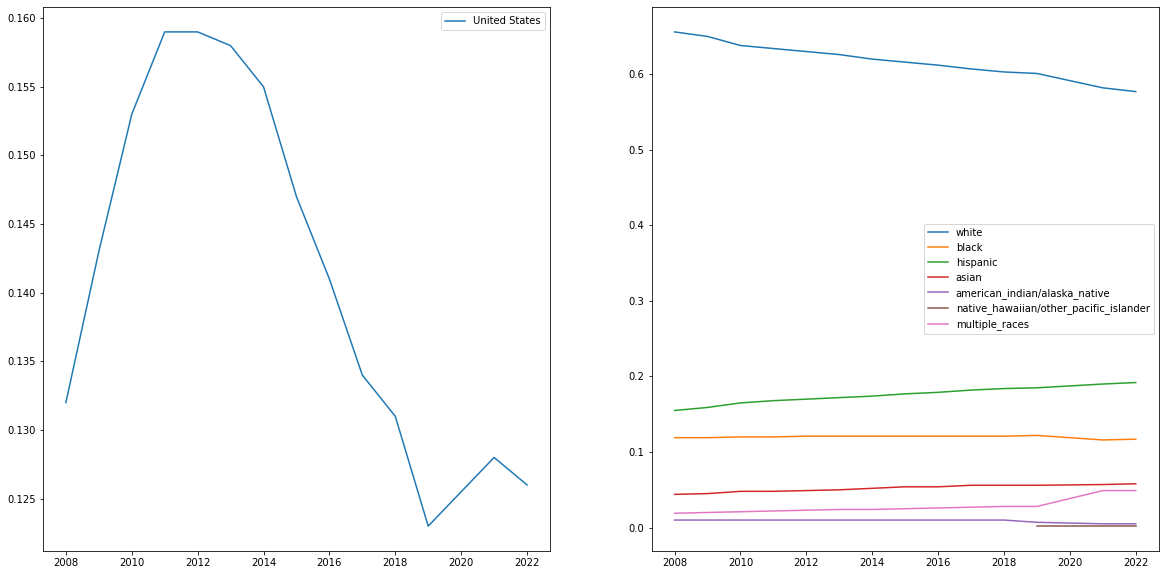

In [73]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
# plt.figure(figsize=(15,15))

# state_list = full_poverty[full_poverty["location"] != "United States"]["location"].unique()[:5]
state_list = ["United States"]
races = [
    "white",
    "black",
    "hispanic",
    "asian",
    "american_indian/alaska_native",
    "native_hawaiian/other_pacific_islander", 
    "multiple_races",
]   

for state in state_list:
    ax1.plot(full_kff[full_kff["location"] == state]["year"].values, full_kff[full_kff["location"] == state]["total"].values, label=state)
    for race in races:
        ax2.plot(full_kff[full_kff["location"] == state]["year"].values, full_kff[full_kff["location"] == state][race].values, label=race)

ax1.legend()
ax1.set_ylabel("Percent in Poverty")
ax1.set_xlabel("Year")
ax1.set_title("Percent Poverty in the US")

ax2.legend()
ax2.set_ylabel("Percent of Population")
ax2.set_xlabel("Year")
ax2.set_title("Racial Breakdown by Year")
